In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cv2
import math

import sys
sys.path.insert(0, '../src')

from my_fourrier import *
from helpers import *

In [2]:
def denoise_frequency(img, threshold_low = 0.1, threshold_high = 0.1):
    fft_img = img.copy()
    
    h, w = fft_img.shape
    
    fft_img[int(threshold_low * h):-int(threshold_high * h), :] = 0
    fft_img[:, int(threshold_low * w):-int(threshold_high * w)] = 0
    
    non_zero_count = np.count_nonzero(fft_img)
    print("amount of non-zeros: ", non_zero_count)
    print("fraction of coefficient: ", non_zero_count / fft_img.size)
    
    denoised = IFFT2(fft_img)
    return denoised.real

In [3]:
def denoise_cutoff(img, cutoff_low = 0.1, cutoff_high = 0.9):
    
    fft_img = img.copy()
    
    fft_max = fft_img.max()
    fft_min = fft_img.min()
    
    cutoff_max = ((fft_max - fft_min) * cutoff_high) + fft_min
    cutoff_min = ((fft_max - fft_min) * cutoff_low) + fft_min
    
    fft_img[fft_img < fft_min] = cutoff_min
    fft_img[fft_img > fft_max] = cutoff_max
    
    denoised = IFFT2(fft_img)    
    return denoised.real

In [4]:
img = cv2.imread("../moonlanding.png", cv2.IMREAD_GRAYSCALE)
og_h, og_w = img.shape

padded = pad_image(img)

fft_img = FFT2(padded)

In [5]:
# upper threshold = 0.1 and lower threshold = 0.1
thresh_1 = denoise_frequency(fft_img)

# upper threshold = 0.2 and lower threshold = 0.2
thresh_2 = denoise_frequency(fft_img, 0.2, 0.2)

# upper threshold = 0.3 and lower threshold = 0.3
thresh_3 = denoise_frequency(fft_img, 0.3, 0.3)

# upper threshold 0.1, no lower threshold
thresh_4 = denoise_frequency(fft_img, 0, 0.1)

# no upper threshold, lower threshold 0.1 
thresh_5 = denoise_frequency(fft_img, 0.1, 0)



amount of non-zeros:  20808
fraction of coefficient:  0.0396881103515625
amount of non-zeros:  83232
fraction of coefficient:  0.15875244140625
amount of non-zeros:  187884
fraction of coefficient:  0.35836029052734375
amount of non-zeros:  5202
fraction of coefficient:  0.009922027587890625
amount of non-zeros:  524288
fraction of coefficient:  1.0


In [6]:
# cutoffs between 0.1 and 0.9 of max values
thresh_6 = denoise_cutoff(fft_img)

# upper threshold of 0.25 and lower threshold of 0.05
thresh_7 = denoise_frequency(fft_img, 0.05, 0.25)

amount of non-zeros:  46971
fraction of coefficient:  0.08959007263183594


In [7]:
# resize all the images
thresh_1 = thresh_1[:og_h, :og_w]
thresh_2 = thresh_2[:og_h, :og_w]
thresh_3 = thresh_3[:og_h, :og_w]
thresh_4 = thresh_4[:og_h, :og_w]
thresh_5 = thresh_5[:og_h, :og_w]
thresh_6 = thresh_6[:og_h, :og_w]
thresh_7 = thresh_7[:og_h, :og_w]

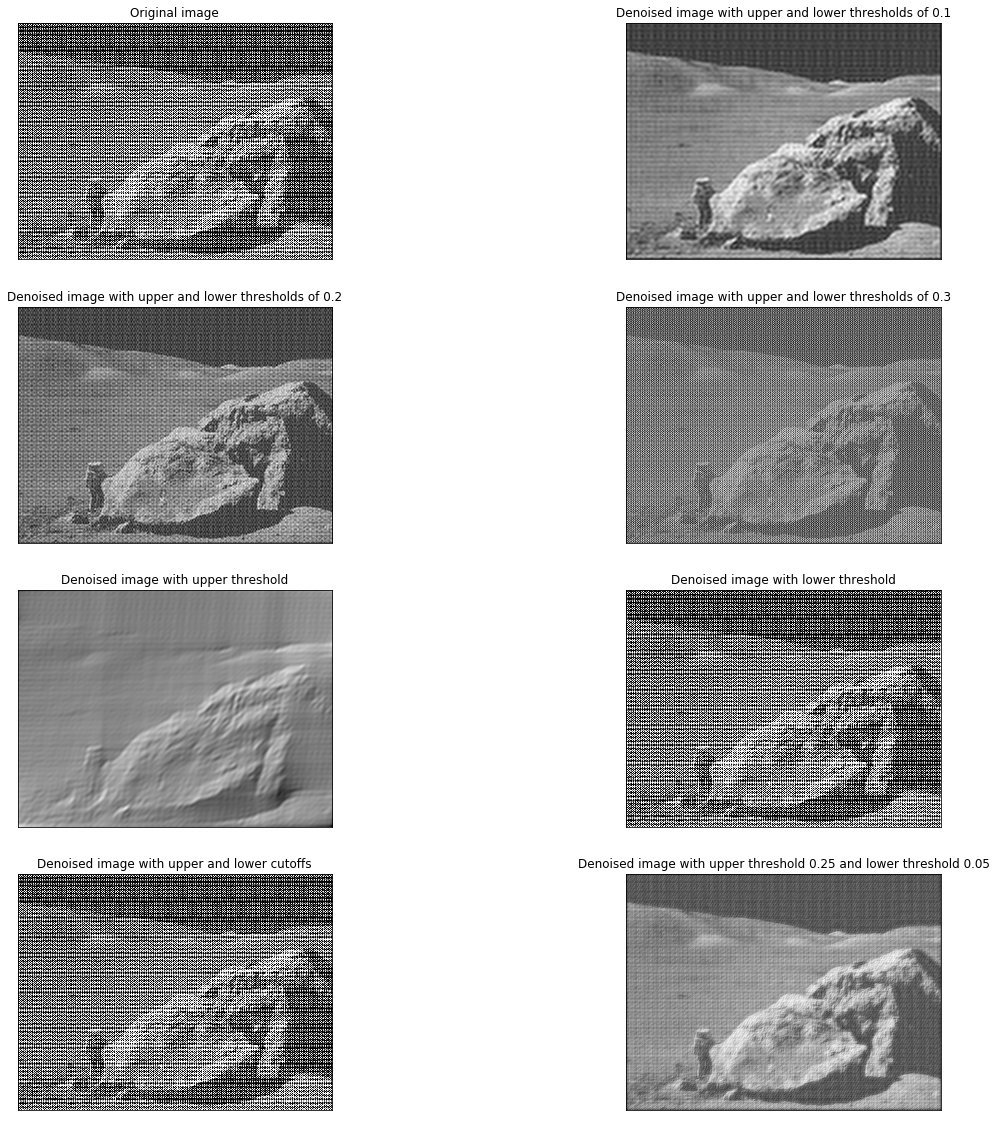

In [8]:
plt.figure(figsize=(20, 20))

plt.subplot(421), plt.imshow(img, cmap='gray')
plt.title("Original image"), plt.xticks([]), plt.yticks([])

plt.subplot(422), plt.imshow(thresh_1, cmap = 'gray')
plt.title("Denoised image with upper and lower thresholds of 0.1"), plt.xticks([]), plt.yticks([])

plt.subplot(423), plt.imshow(thresh_2, cmap = 'gray')
plt.title("Denoised image with upper and lower thresholds of 0.2"), plt.xticks([]), plt.yticks([])

plt.subplot(424), plt.imshow(thresh_3, cmap = 'gray')
plt.title("Denoised image with upper and lower thresholds of 0.3"), plt.xticks([]), plt.yticks([])

plt.subplot(425), plt.imshow(thresh_4, cmap = 'gray')
plt.title("Denoised image with upper threshold"), plt.xticks([]), plt.yticks([])

plt.subplot(426), plt.imshow(thresh_5, cmap = 'gray')
plt.title("Denoised image with lower threshold"), plt.xticks([]), plt.yticks([])

plt.subplot(427), plt.imshow(thresh_6, cmap = 'gray')
plt.title("Denoised image with upper and lower cutoffs"), plt.xticks([]), plt.yticks([])

plt.subplot(428), plt.imshow(thresh_7, cmap = 'gray')
plt.title("Denoised image with upper threshold 0.25 and lower threshold 0.05"), plt.xticks([]), plt.yticks([])


plt.show()